In [1]:
import numpy as np
import matplotlib.pyplot as plt
from training import Experiment
import os
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

from datetime import datetime
import pickle
import matplotlib

# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
matplotlib.rc('font', serif='cm10')
matplotlib.rc('text', usetex=True)

axinticks=[]
plt.rcParams.update({'font.size': 45})

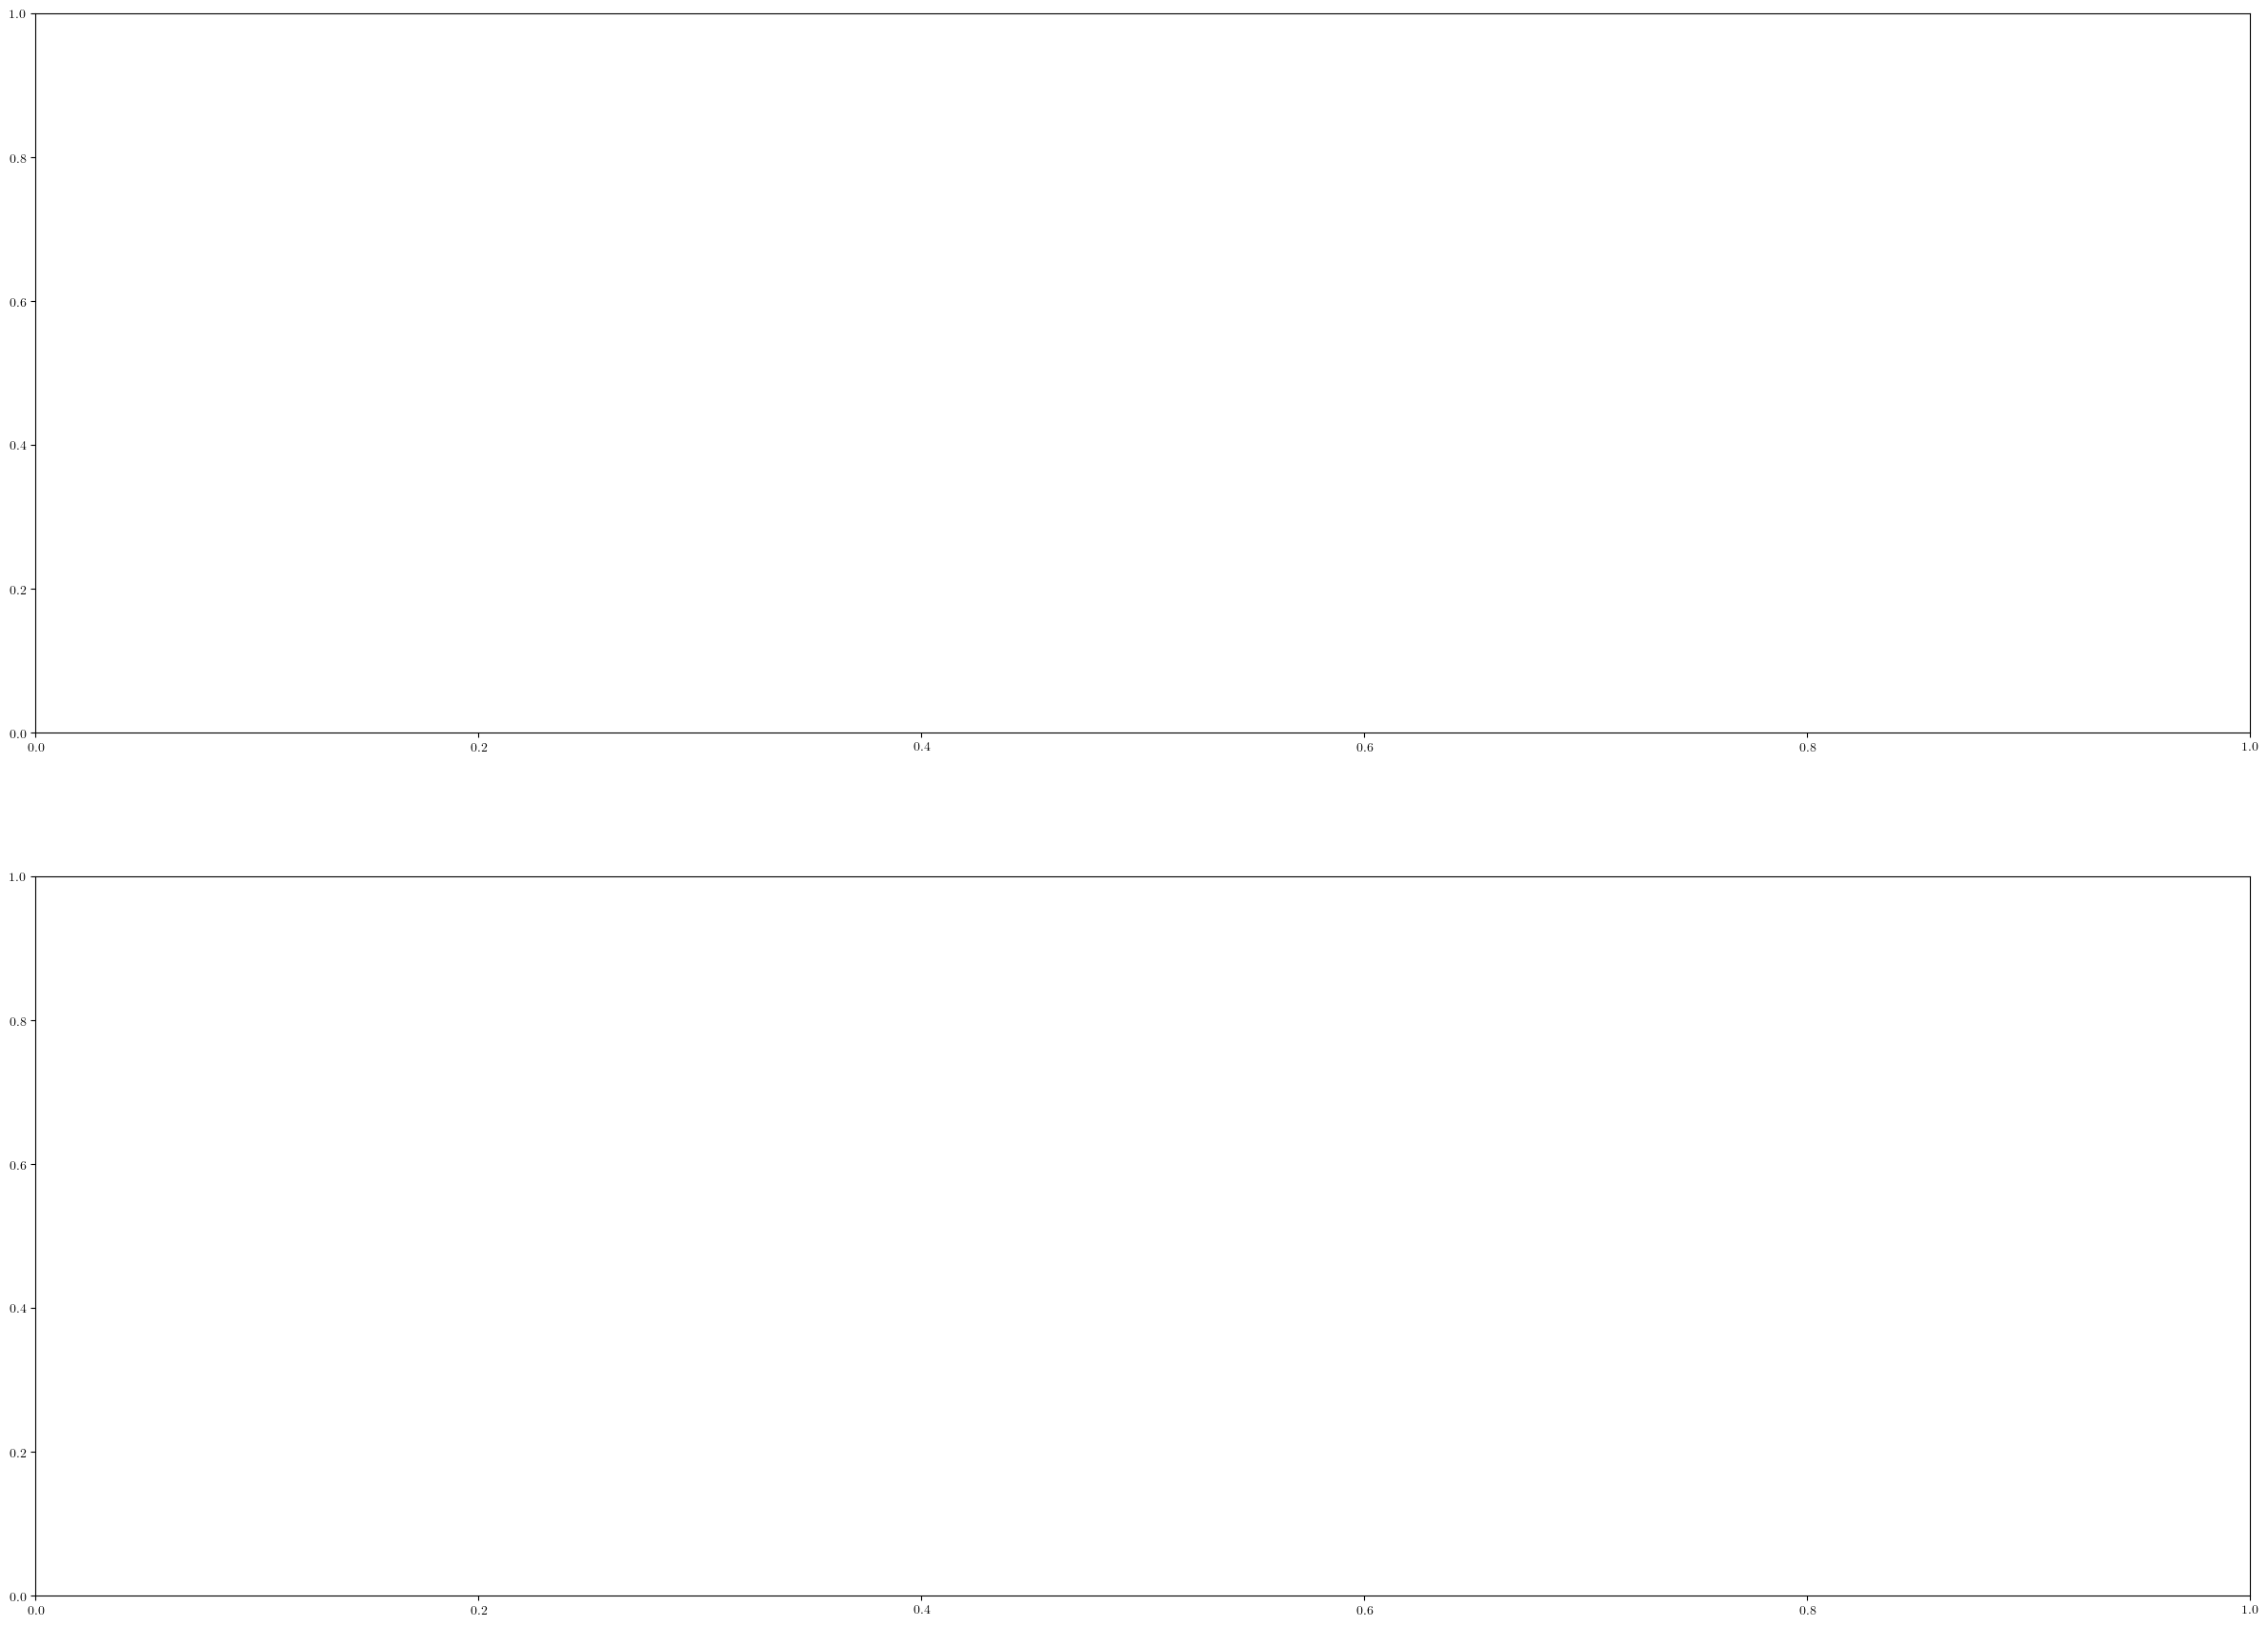

In [3]:

#details = [energy, layers, resolution]
#dict is a dictornary with the labels you want to assign
plt.figure(figsize=(30,22), dpi=100)
ax1 = plt.subplot2grid((2,1), (0,0))
ax2 = plt.subplot2grid((2,1), (1,0))

In [12]:
cumre=[]
for i in range(1,6):
    exp = Experiment()
    exp.load_data("run_"+str(i))
    cumre.append(exp.results[1][-1]/exp.results[0][-1])

2L2PH0.1R
run_1
2L2PH0.1R
run_2
2L2PH0.1R
run_3
2L2PH0.1R
run_4
2L2PH0.1R
run_5


In [14]:
cumpro=[]
for i in range(1,6):
    exp = Experiment()
    exp.load_data("run_"+str(i))
    exp.
    cumpro.append(exp.results[2][-1])

2L2PH0.1R
run_1
2L2PH0.1R
run_2
2L2PH0.1R
run_3
2L2PH0.1R
run_4
2L2PH0.1R
run_5


In [17]:
np.loadtxt("DKrs.csv")

array([0.4418326 , 0.43636106, 0.43095175, 0.42560452, 0.42031922,
       0.41509568, 0.40993374, 0.40483324, 0.399794  , 0.39481584,
       0.38989857, 0.38504201, 0.38024596, 0.37551021, 0.37083455,
       0.36621877, 0.36166263, 0.35716591, 0.35272836, 0.34834975,
       0.3440298 , 0.33976826, 0.33556485, 0.33141929, 0.32733129,
       0.32330053, 0.31932672, 0.31540952, 0.31154861, 0.30774364,
       0.30399424, 0.30030005, 0.2966607 , 0.29307578, 0.28954488,
       0.28606759, 0.28264348, 0.27927208, 0.27595294, 0.27268557,
       0.26946948, 0.26630415, 0.26318905, 0.26012363, 0.25710732,
       0.25413954, 0.25121966, 0.24834706, 0.24552109, 0.24274107,
       0.24000628, 0.237316  , 0.23466947, 0.23206589, 0.22950443,
       0.22698422, 0.22450435, 0.22206388, 0.21966179, 0.21729702,
       0.21496844, 0.21267485, 0.21041496, 0.20818737, 0.20599058,
       0.20382295, 0.20168268, 0.19956778, 0.19747604, 0.19540494,
       0.19335168, 0.19131302, 0.18928524, 0.18726401, 0.18524

In [16]:
plt.plot()

[0.7594777777777778,
 0.6046666666666667,
 0.6221777777777778,
 0.5695222222222223,
 0.5213]

In [ ]:

def ploting(dict, mode="minimax", mode_log="on", save=True, show=False, particular_name="std", logyaxis=False):
    """ Function that plots what's inside of the dictionary, obtained in the corresponding front_end program.

        mode: when averaging many learners, choice between ploting, at each time, the minimum value among all agents and the maximum (minimax), or the standard deviation (stds).

        mode_log: put log10(x) if on, else not
    """


    #details = [energy, layers, resolution]
    #dict is a dictornary with the labels you want to assign
    plt.figure(figsize=(30,22), dpi=100)
    ax1 = plt.subplot2grid((2,1), (0,0))
    ax2 = plt.subplot2grid((2,1), (1,0))
    name = str(dict.keys())

    once=True
    neg="Not"


    for run in dict.keys():
        print(run)
        number_phases, amplitude, layers, resolution, searching_method, guessing_rule, method_guess, number_bobs, bound_displacements,efficient_time, ts_method = dict[run]["info"]
        exp = Experiment(number_phases=number_phases, amplitude= amplitude, layers=layers, resolution=resolution, bound_displacements=bound_displacements)
        exp.load_data(run)
        run_color = colors[run]

        if mode_log == "on":
            times = np.log10(exp.results[0])
        else:
            times = exp.results[0]

        if once==True:
            ax1.plot(times,exp.optimal_value*np.ones(len(exp.results[0])), '--',linewidth=9, alpha=0.8, label=r'$P_*^{(2)}$', color=color_2l)
            ax1.plot([times[0], times[-1]], [exp.homodyne_limit]*2, '--', linewidth=9 , color="black", label="Homodyne limit")

            if logyaxis == True:
                ax2.plot([times[0], times[-1]], np.log10([exp.homodyne_limit]*2), '--', linewidth=9 , color="black", label="Homodyne limit")
            else:
                ax2.plot([times[0], times[-1]], [exp.homodyne_limit]*2, '--', linewidth=9 , color="black", label="Homodyne limit")
            if logyaxis==True:
                ax2.plot(times,np.log10(exp.optimal_value*np.ones(len(times))), '--',linewidth=9, alpha=0.6, color=color_2l)
            else:
                ax2.plot(times,exp.optimal_value*np.ones(len(times)), '--',linewidth=9, alpha=0.6, color=color_2l)

            axins = zoomed_inset_axes(ax2, zoom=3,loc="lower right")
            loc1=-int(len(exp.results[0])*0.5)
            loc2=-1
            once=False


        ax1.plot(times, exp.results[1]/exp.results[0], linewidth=9, alpha=0.9,label=dict[run]["label"], color=run_color)
        if logyaxis==True:
            ax2.plot(times, np.log10(exp.results[2]),linewidth=6 ,alpha=0.5, label=dict[run]["label"], color=run_color)
        else:
            ax2.plot(times, exp.results[2],linewidth=6 ,alpha=.5, label=dict[run]["label"], color=run_color)


        if number_bobs>1:
            if mode == "minimax":
                print("not in the paper!")

            elif mode == "stds":
                if logyaxis==False:

                    axins.plot(np.log10(exp.results[0][loc1:loc2]), exp.results[2][loc1:loc2], '-', linewidth=9,alpha=.8, color=colors[run], label=dict[run]["label"])
                    axins.fill_between(np.log10(exp.results[0][loc1:loc2]), (exp.results[2][loc1:loc2] - exp.stds[1][loc1:loc2]/2),(exp.results[2][loc1:loc2] + exp.stds[1][loc1:loc2]/2),alpha=.2, facecolor=colors[run])

                    axins.plot(np.log10([exp.results[0][loc1], exp.results[0][loc2-1]]), [1-exp.opt_2l]*2, '-.', alpha=.8, linewidth=9,color=color_2l,
                    label="Optimal 2L")

                    axinticks.append(exp.results[2][loc1])

                    ax1.fill_between(times, (exp.results[1] - exp.stds[0]/2)/exp.results[0],
                    (exp.results[1] + exp.stds[0]/2)/exp.results[0], alpha=0.4, color=run_color)
                    ax2.fill_between(times,  exp.results[2] - exp.stds[1]/2 ,  exp.results[2] + exp.stds[1]/2, alpha=0.4, color=run_color)

                else:

                    axins.plot(np.log10(exp.results[0][loc1:loc2]), np.log10(exp.results[2][loc1:loc2]), '-', linewidth=9,alpha=.8, color=colors[run], label=dict[run]["label"])
                    axins.fill_between(np.log10(exp.results[0][loc1:loc2]), np.log10(exp.results[2][loc1:loc2] - exp.stds[1][loc1:loc2]/2),np.log10(exp.results[2][loc1:loc2] + exp.stds[1][loc1:loc2]/2),alpha=.2, facecolor=colors[run])

                    axins.plot(np.log10([exp.results[0][loc1], exp.results[0][loc2-1]]), np.log10([1-exp.opt_2l]*2), '-.', alpha=.8, linewidth=9,color=color_2l,
                    label="Optimal 2L")

                    axinticks.append(np.log10(exp.results[2][loc1]))

                    ax1.fill_between(times, (exp.results[1] - exp.stds[0]/2)/exp.results[0],
                    (exp.results[1] + exp.stds[0]/2)/exp.results[0], alpha=.4, color=run_color)
                    ax2.fill_between(times,  np.log10(exp.results[2] - exp.stds[1]/2) , np.log10(exp.results[2] + exp.stds[1]/2), alpha=0.4, color=run_color)


            else:
                print("specify a method to show the deviation: minimax or stds")
    ax1.legend()
    mark_inset(ax2, axins, loc1=1, loc2=2, fc="green", ec="0.3", alpha=0.5)
    if logyaxis == True:
        axinticks.append(np.log10(1-exp.opt_2l))
        yticks = np.arange(np.round(min(exp.results[2]),1),1-exp.opt_2l,.1)
        ax1.set_yticks(yticks)
        ax2.set_yticks(np.log10(yticks))
        ax2.set_yticklabels([str(np.round(i,1)) for i in yticks])

        axins.set_yticks(axinticks)
        axins.set_yticklabels([str(np.round(i,3)) for i in axinticks])

        plt.setp(axins.get_yticklabels(), size=27)

    else:
        axinticks.append(1-exp.opt_2l)
        yticks = np.arange(np.round(min(exp.results[2]),1),1-exp.opt_2l,.1)
        ax1.set_yticks(yticks)
        ax2.set_yticks(yticks)

        axins.set_yticks(axinticks)
        axins.set_yticklabels([str(np.round(i,2)) for i in axinticks])
        plt.setp(axins.get_yticklabels(), size=27)


    plt.setp(axins.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax2.set_xticklabels(['',r'$10^{0}$',r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$',r'$10^{5}$',''])
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)

    ax2.tick_params(axis='x', which='both',top='off')

    ax1.legend(loc="lower right", prop={"size":35})
    ax2.set_xlabel("t", size=54)
    #
    ax1.set_ylabel(r'\textbf{R}$_t$', size=54)
    ax2.set_ylabel(r'\textbf{P}$_t$', size=54)

    if mode_log=="off":
        name = "lx_off"+name
    if save == True:
        inf = dict[run]["info"]
        layers, phases, resolution = inf[2], inf[0], inf[3]
        if particular_name != "std":
            # plt.savefig(str(layers) + "L" + str(phases) + "PH"+str(resolution) + "R/figures/"+particular_name+".pdf")
            plt.savefig(str(layers) + "L" + str(phases) + "PH"+str(resolution) + "R/figures/"+particular_name+".png")

        else:
            plt.savefig(str(layers) + "L" + str(phases) + "PH"+str(resolution) + "R/figures/"+name+"-"+str(mode)+".pdf")
    if show == True:
        plt.show()

# color1 = (69/255, 209/255, 154/255)
color1="purple"
color2 = (225/255, 15/255, 245/255)
color3 = (150/255, 22/255, 9/255)
color_2l = [46/255, 30/255, 251/255]

colorucb1 = (19/255, 115/255,16/255)
colorucb2 = (170/255,150/255,223/255)
colorucb3 = (74/255, 90/255, 93/255)
colors = {"run_1": color1, "run_2": color2, "run_3":color3, "run_4":"purple", "run_9":"orange", "run_5":colorucb1, "run_6": colorucb2, "run_7":colorucb3, "run_8":"green", "run_16":"yellow", "run_17":"brown"}
#PALLETTEEEE https://htmlcolorcodes.com/



from misc import load_obj
# dict = load_obj("all_favourite_methods_x1000", resolution=0.7)
# dict = load_obj("exp-ep-greedy-Dolinar_x500", resolution=0.7)
name = "all_methods_x48_ep100"
dict = load_obj(name, resolution=0.1, layers=2)

#
# labels_all = {"run_1":r'$\epsilon = 0.01$'+"-greedy" , "run_2": r'$\epsilon = Max(0.01, e^{-t/\tau}$)', "run_3": "1-greedy", "run_4":"ucb ucb", "run_5": "exp-"+r'$\epsilon$' + " + TS", "run_6": "exp-gre + 0.1-TS", "run_7": "TS-TS", "run_8": "0.1(TS+TS)", "run_9": "ucb + ucb (banditalg)", "run_10": "ucb+ucb (anormal)", "run_11": "ucb + TS", "run_12": "exp-"+r'$\epsilon$' + " +ucb"}
#
# labels = {"run_1":r'$\epsilon = 0.01$'+"-greedy" , "run_2": r'$\epsilon = 0.3$'+"-greedy", "run_3": r'$\epsilon = 1$'+"-greedy", "run_8":"Max(0.01, "+r'$e^{-t/\tau}$'+")-greedy", "run_12":"UCB-1", "run_13":"UCB-2", "run_14":"UCB-3", "run_15":"0.01-TS", "run_16": "0.1-TS", "run_9":"1-TS"} #r'$\epsilon = Max(0.01, e^{-t/\tau}$)', "run_3": "1-greedy"}

labels = {"run_1":r'$\epsilon = 0.01$'+"-greedy" , "run_2": r'$\epsilon = 0.3$'+"-greedy", "run_3": r'$\epsilon = 1$'+"-greedy", "run_4":"Max(0.01, "+r'$e^{-t/\tau}$'+")-greedy", "run_5":"UCB-1","run_6":"UCB-2","run_7":"UCB-3","run_8":"1-TS"} #



# dict = load_obj("ep-greedy-Dolinar_x1", resolution=0.33)
# # for i in dict.keys():
# #     print(i, dict[i]["label"])
# interesting = ["run_10","run_16", "run_2"]
# interesting = ["run_1","run_2", "run_3", "run_4","run_5"]
interesting = ["run_4","run_6", "run_8"]
# interesting = dict.keys()
# #
dict_plot = {}
print(dict)
for i in interesting:
    dict_plot[i] = dict[i]
print(dict_plot)
for run in interesting:
    dict_plot[run]["label"] = labels[run]
# dict_plot = {"run_8":{"label":"Max(0.01, "+r'$e^{-t/\tau}$'+")-greedy", "method":[],"info":[0]*11}, "run_12":{"label":"UCB-2","method":[],"info":[0]*11}, "run_9":{"label": "TS","method":[],"info":[0]*11}}
ploting(dict_plot,mode_log="on",save=True,logyaxis=False,show=True, particular_name="enh-QL",mode="stds")
